In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Read data
data = pd.read_csv("train.csv", sep = ";")

In [3]:
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            6.6               0.3         0.36             1.2      0.035   
1            7.7               0.5         0.26             1.9      0.062   
2            8.4               0.5         0.35             2.9      0.076   
3            7.5               0.4         0.33             5.0      0.045   
4            6.4               0.2         0.25            20.2      0.083   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                   43                   126   0.9909  3.01       0.63   
1                    9                    31   0.9966  3.39       0.64   
2                   21                   127   0.9976  3.23       0.63   
3                   30                   131   0.9942  3.32       0.44   
4                   35                   157   0.9998  3.17       0.50   

   alcohol  quality   type  
0     11.4        6  white  
1      9.6        5    red  
2      9.2        5    red  
3     10.9        6  white  
4      9.1        5  white

In [4]:
### Preprocessing Data

In [5]:
#Check missing data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6714 entries, 0 to 6713
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6714 non-null   float64
 1   volatile acidity      6714 non-null   float64
 2   citric acid           6714 non-null   float64
 3   residual sugar        6714 non-null   float64
 4   chlorides             6714 non-null   float64
 5   free sulfur dioxide   6714 non-null   int64  
 6   total sulfur dioxide  6714 non-null   int64  
 7   density               6714 non-null   float64
 8   pH                    6714 non-null   float64
 9   sulphates             6714 non-null   float64
 10  alcohol               6714 non-null   float64
 11  quality               6714 non-null   int64  
 12  type                  6714 non-null   object 
dtypes: float64(9), int64(3), object(1)
memory usage: 682.0+ KB


In [6]:
#Change Type to bit
data.type = data.type.apply(lambda x : x.replace("white","1"))
data.type = data.type.apply(lambda x : x.replace("red","0"))

In [7]:
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            6.6               0.3         0.36             1.2      0.035   
1            7.7               0.5         0.26             1.9      0.062   
2            8.4               0.5         0.35             2.9      0.076   
3            7.5               0.4         0.33             5.0      0.045   
4            6.4               0.2         0.25            20.2      0.083   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                   43                   126   0.9909  3.01       0.63   
1                    9                    31   0.9966  3.39       0.64   
2                   21                   127   0.9976  3.23       0.63   
3                   30                   131   0.9942  3.32       0.44   
4                   35                   157   0.9998  3.17       0.50   

   alcohol  quality type  
0     11.4        6    1  
1      9.6        5    0  
2      9.2        5    0  
3     10.9        6    1  
4      9.1        5    1

In [8]:
#describe data
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6714.000000       6714.000000  6714.000000     6714.000000   
mean        7.251638          0.348436     0.317466        5.411871   
std         1.330423          0.168505     0.148842        4.739180   
min         3.800000          0.100000     0.000000        0.600000   
25%         6.400000          0.200000     0.240000        1.800000   
50%         7.000000          0.300000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.000000   
max        15.900000          1.300000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6714.000000          6714.000000           6714.000000  6714.000000   
mean      0.057506            30.132559            114.576259     0.994789   
std       0.038175            17.619884             56.417138     0.003020   
min       0.009000             1.000000              6.000000     0.987100   
25%       0.038000            16.000000             75.000000     0.992400   
50%       0.048000            28.000000            117.000000     0.995100   
75%       0.068000            41.000000            155.000000     0.997100   
max       0.611000           289.000000            440.000000     1.039000   

                pH    sulphates      alcohol      quality  
count  6714.000000  6714.000000  6714.000000  6714.000000  
mean      3.219103     0.536120    10.458743     5.796098  
std       0.160737     0.157877     1.189933     0.883490  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.200000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

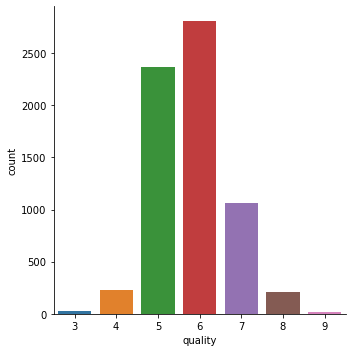

In [9]:
# number of values for each quality
sns.catplot(x='quality', data = data, kind = 'count')

In [10]:
#correlation
correlation = data.corr()

<AxesSubplot:>

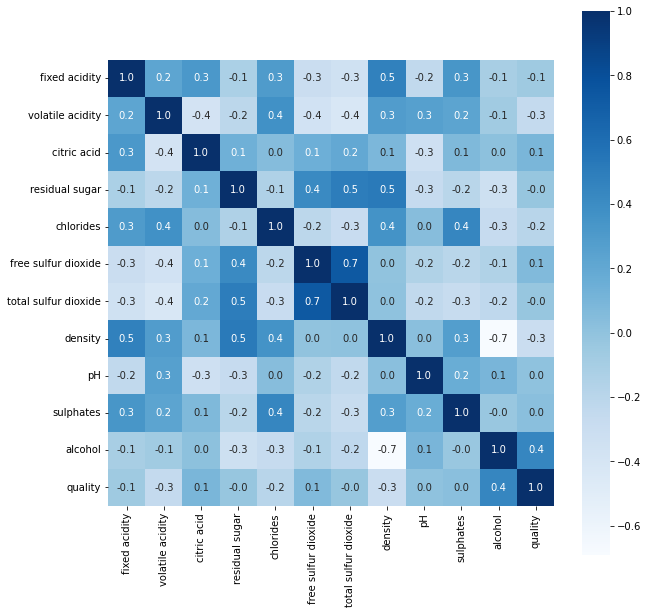

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':10}, cmap = 'Blues')

In [13]:
#selection data
x = data.drop('quality',axis=1)
x = x.drop('density',axis=1)
y = data['quality']

In [15]:
x

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               6.6               0.3         0.36             1.2      0.035   
1               7.7               0.5         0.26             1.9      0.062   
2               8.4               0.5         0.35             2.9      0.076   
3               7.5               0.4         0.33             5.0      0.045   
4               6.4               0.2         0.25            20.2      0.083   
...             ...               ...          ...             ...        ...   
6709            7.2               0.2         0.19             7.7      0.045   
6710            6.7               0.3         0.34             7.5      0.036   
6711            6.6               0.3         0.24             3.3      0.034   
6712            8.0               0.2         0.31             5.6      0.049   
6713            6.4               0.3         0.20            15.6      0.040   

      free sulfur dioxide  total sulfur dioxide    pH  sulphates  alcohol type  
0                      43                   126  3.01       0.63     11.4    1  
1                       9                    31  3.39       0.64      9.6    0  
2                      21                   127  3.23       0.63      9.2    0  
3                      30                   131  3.32       0.44     10.9    1  
4                      35                   157  3.17       0.50      9.1    1  
...                   ...                   ...   ...        ...      ...  ...  
6709                   53                   176  3.17       0.38      9.5    1  
6710                   39                   124  2.99       0.32     12.4    1  
6711                   29                    99  3.10       0.40     12.3    1  
6712                   24                    97  3.10       0.42     10.9    1  
6713                   20                   142  3.10       0.54     10.6    1  

[6714 rows x 11 columns]

In [16]:
#read data to test
test = pd.read_csv("test.csv", sep = ";")

In [17]:
#Change Type to bit
test.type = test.type.apply(lambda x : x.replace("white","1"))
test.type = test.type.apply(lambda x : x.replace("red","0"))

In [18]:
#selection data
idt = test['id']
xt = test.drop('id',axis = 1)
xt = xt.drop('density',axis = 1)

In [19]:
# Split data to train and test
from sklearn.model_selection import train_test_split
x_train,x_valid,y_train,y_valid= train_test_split(x,y,train_size =0.85,test_size=0.15,random_state = 0)

In [20]:
#normalization data
from sklearn.preprocessing import MinMaxScaler
# creating normalization object 
norm = MinMaxScaler()
# fit data
norm_fit = norm.fit(x_train)
new_xtrain = norm_fit.transform(x_train)
new_xtest = norm_fit.transform(x_valid)
new_xt = norm_fit.transform(xt)

In [21]:
### Training model

In [22]:
#model DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state = 1)

In [23]:
#fit training data
dt_model.fit(new_xtrain,y_train)

DecisionTreeRegressor(random_state=1)

In [24]:
#test model
y_dt_predict = dt_model.predict(new_xt)

In [25]:
df_r = pd.DataFrame({'id':idt,'quality':y_dt_predict})

In [26]:
df_r.to_csv("sm.csv",index=False)

In [27]:
#pd.DataFrame({'y':y_valid,'y_predict':y_dt_predict})

In [28]:
#print result


In [29]:
#model RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
rf_model = RandomForestRegressor(random_state = 2,n_estimators=83,criterion='friedman_mse',max_depth = 9)
#n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, 
#min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, 
#oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None

In [30]:
#fit training data
rf_model.fit(new_xtrain,y_train)

RandomForestRegressor(criterion='friedman_mse', max_depth=9, n_estimators=83,
                      random_state=2)

In [31]:
#test model
y_rf_predict = rf_model.predict(new_xt)

In [32]:
#print result
df_r = pd.DataFrame({'id':idt,'quality':y_rf_predict})
df_r.to_csv("sm_rf.csv",index=False)

In [30]:
# import math  
# import sklearn.metrics  

In [31]:
# for i in range(0,11,1):
#     from sklearn.ensemble import RandomForestRegressor
#     rf_model = RandomForestRegressor(random_state = 13,n_estimators=120,criterion='friedman_mse')
#     rf_model.fit(new_xtrain,y_train)
#     y_rf_predict = rf_model.predict(new_xt)
#     df_r = pd.DataFrame({'1':y_rf_predict})
#     df_r.to_csv("sm_rf_c.csv",index=False)

#     data_r = pd.read_csv("rs.csv")
#     data_s = pd.read_csv("sm_rf_c.csv")
#     mse = sklearn.metrics.mean_squared_error(data_r, data_s)
#     rmse = math.sqrt(mse) 
#     print("AT ccp_alpha:",i,"RMSE:", rmse)  

In [32]:
#AT random_state: 13 RMSE: 0.7833868776026314
#     AT n_estimators: 120 RMSE: 0.7807664763874065
#         AT criterion: friedman_mse RMSE: 0.7804491966229993
#             => 0.77396
#     AT n_estimators: 121 RMSE: 0.7808067257446257
#         AT criterion:friedman_mse RMSE: 0.7804986343664887
            
#     AT n_estimators: 122 RMSE: 0.7808730589862619
#         AT criterion:friedman_mse RMSE: 0.7805459339178717
            
#AT random_state: 2 RMSE: 0.7827240581581176
#     AT n_estimators: 80 RMSE: 0.7817357026779981
#         AT criterion:friedman_mse RMSE: 0.7807356843653704

#     AT n_estimators: 82 RMSE: 0.781605549090963
#         AT criterion:friedman_mse RMSE: 0.7807356843653704

#     AT n_estimators: 83 RMSE: 0.7817087353280061
#         AT criterion:friedman_mse RMSE: 0.7807266554837202
#         =>0.77984
#AT random_state: 26 RMSE: 0.7845076908948507
#     AT n_estimators: 50 RMSE: 0.7838840133217818
#         AT criterion:friedman_mse RMSE: 0.7831129252276051

#     AT n_estimators: 92 RMSE: 0.7839121788883671
#         AT criterion:friedman_mse RMSE: 0.7827108673143477

#     AT n_estimators: 93 RMSE: 0.7839825554991999
#         AT criterion:friedman_mse RMSE: 0.7827751825210763


    
    
    
    